In [19]:
from bs4 import BeautifulSoup
import pandas as pd
import csv
import requests

In [4]:
url = "https://dhhumanist.org"
result = requests.get("https://dhhumanist.org/")

print(result.status_code)
print(result.headers)
page = result.content

# How would we get all the links to volumes from the Humanist Page?

soup = BeautifulSoup(page)

200
{'Server': 'ATS', 'Date': 'Tue, 31 Mar 2020 18:35:00 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Content-Length': '5743', 'X-Frame-Options': 'SAMEORIGIN', 'Age': '0', 'Connection': 'keep-alive'}


https://dhhumanist.org/Archives/Current/ https://dhhumanist.org/Archives/Converted_Text/

In [18]:
links = ['https://dhhumanist.org/Archives/Converted_Text/', 'https://dhhumanist.org/Archives/Current/']
texts = []
for link in links:
    result = requests.get(link)
    page = result.content

    soup = BeautifulSoup(page)
    text_links = soup.find_all('a')
    for txt_link in text_links:
        url = txt_link.get('href')
        if 'txt' in url:
            print(link+url)
            text_result = requests.get(link+url)
            text_page = text_result.content
            text_soup = BeautifulSoup(text_page)
            text = text_soup.get_text()
            dates = url.split('.')[1]
            texts.append({'dates': dates, 'text': text})

https://dhhumanist.org/Archives/Converted_Text/humanist.1987-1988.txt
1987-1988
https://dhhumanist.org/Archives/Converted_Text/humanist.1988-1989.txt
1988-1989
https://dhhumanist.org/Archives/Converted_Text/humanist.1989-1990.txt
1989-1990
https://dhhumanist.org/Archives/Converted_Text/humanist.1990-1991.txt
1990-1991
https://dhhumanist.org/Archives/Converted_Text/humanist.1991-1992.txt
1991-1992
https://dhhumanist.org/Archives/Converted_Text/humanist.1992-1993.txt
1992-1993
https://dhhumanist.org/Archives/Converted_Text/humanist.1993-1994.txt
1993-1994
https://dhhumanist.org/Archives/Converted_Text/humanist.1994-1995.txt
1994-1995
https://dhhumanist.org/Archives/Converted_Text/humanist.1995-1996.txt
1995-1996
https://dhhumanist.org/Archives/Converted_Text/humanist.1996-1997.txt
1996-1997
https://dhhumanist.org/Archives/Converted_Text/humanist.1997-1998.txt
1997-1998
https://dhhumanist.org/Archives/Converted_Text/humanist.1998-1999.txt
1998-1999
https://dhhumanist.org/Archives/Converte

In [20]:
humanist_vols = pd.read_csv('web_scraped_humanist_listserv.csv')

In [21]:
humanist_vols


,Unnamed: 0,dates,text
0,0,1987-1988,From: MCCARTY@UTOREPAS\nSubject: \nDate: 12 Ma...
1,1,1988-1989,From: Sebastian Rahtz \nSubject: C++ and Gnu o...
2,2,1989-1990,From: Willard McCarty \nSubject: Happy Birthda...
3,3,1990-1991,From: Elaine Brennan & Allen Renear \nSubject:...
4,4,1991-1992,From: Elaine Brennan & Allen Renear \nSubject:...
5,5,1992-1993,From: Elaine M Brennan \nSubject: Humanist's B...
6,6,1993-1994,From: 6500card%ucsbuxa@hub.ucsb.edu (Cheryl A....
7,7,1994-1995,From: Andrew Burday \nSubject: Re: 7.0638 Qs: ...
8,8,1995-1996,"From: ""Gregory Bloomquist"" \nSubject: Round Ta..."
9,9,1996-1997,From: Humanist \nSubject: Humanist begins its ...


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
import numpy as np

In [28]:
vectorizer = TfidfVectorizer(max_df=.65, min_df=1, stop_words=None, use_idf=True, norm=None)
all_docs = humanist_vols[0:3]['text'].tolist()

In [29]:
transformed_documents = vectorizer.fit_transform(all_docs)

In [30]:
transformed_documents_as_array = transformed_documents.toarray()
# use this line of code to verify that the numpy array represents the same number of documents that we have in the file list
len(transformed_documents_as_array)

3

In [32]:
# loop each item in transformed_documents_as_array, using enumerate to keep track of the current position
for counter, doc in enumerate(transformed_documents_as_array):
    # construct a dataframe
    tf_idf_tuples = list(zip(vectorizer.get_feature_names(), doc))
    one_doc_as_df = pd.DataFrame.from_records(tf_idf_tuples, columns=['term', 'score']).sort_values(by='score', ascending=False).reset_index(drop=True)
    print(one_doc_as_df[0:10])

           term      score
0        cmi011  50.794415
1         hirst  44.021827
2           050  42.328680
3         husc6  38.942385
4            q1  32.169796
5  paralanguage  32.169796
6      gargoyle  28.783502
7       deredec  28.783502
8        estfri  28.783502
9           oda  27.090355
         term       score
0       astra  108.361420
1    makrolog   45.714974
2      oikawa   42.328680
3  wesolowski   42.328680
4     voorhis   40.635532
5       melby   37.249238
6       adamo   35.556091
7         sdr   33.862944
8       tovna   32.169796
9       memdb   27.090355
          term       score
0      kessler  237.040605
1    warkentin  133.758627
2      donnell  120.213450
3      fraktur  104.975125
4      lenoble  104.975125
5        halio   88.043653
6      laptops   82.964212
7         unhd   79.577917
8     gutnberg   77.884770
9  uncertainty   72.805329


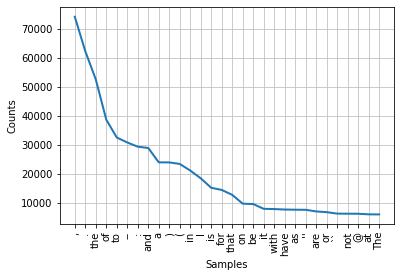

In [33]:
from nltk import word_tokenize
from nltk import FreqDist

tokens = FreqDist(sum(humanist_vols[0:3]['text'].map(word_tokenize), []))
tokens.plot(30)

In [34]:
tokens

FreqDist({',': 74126, '.': 62235, 'the': 52502, 'of': 38599, 'to': 32453, '--': 30737, ':': 29282, 'and': 28844, 'a': 23878, ')': 23853, ...})

In [35]:
text = humanist_vols[0:1].text.tolist()

In [38]:
tokenized_text = word_tokenize(text[0])

In [39]:
tokenized_text

['From',
 ':',
 'MCCARTY',
 '@',
 'UTOREPAS',
 'Subject',
 ':',
 'Date',
 ':',
 '12',
 'May',
 '1987',
 ',',
 '23:50:02',
 'EDT',
 'X-Humanist',
 ':',
 'Vol',
 '.',
 '1',
 'Num',
 '.',
 '1',
 '(',
 '1',
 ')',
 'This',
 'is',
 'test',
 'number',
 '1',
 '.',
 'Please',
 'acknowledge',
 '.',
 'From',
 ':',
 'MCCARTY',
 '@',
 'UTOREPAS',
 'Subject',
 ':',
 'Date',
 ':',
 '13',
 'May',
 '1987',
 ',',
 '00:06:41',
 'EDT',
 'X-Humanist',
 ':',
 'Vol',
 '.',
 '1',
 'Num',
 '.',
 '2',
 '(',
 '2',
 ')',
 'This',
 'is',
 'test',
 'number',
 '2',
 '.',
 'Please',
 'acknowledge',
 '.',
 'From',
 ':',
 'MCCARTY',
 '@',
 'UTOREPAS',
 'Subject',
 ':',
 'Date',
 ':',
 '13',
 'May',
 '1987',
 ',',
 '23:08:57',
 'EDT',
 'X-Humanist',
 ':',
 'Vol',
 '.',
 '1',
 'Num',
 '.',
 '3',
 '(',
 '3',
 ')',
 'This',
 'is',
 'a',
 'test',
 'of',
 'a',
 'new',
 'BITNET',
 'mailer',
 'for',
 'people',
 'involved',
 'with',
 'the',
 'support',
 'of',
 'computing',
 'in',
 'the',
 'humanities',
 '.',
 'Please',
 'acknow

In [41]:
from nltk.corpus import stopwords

In [42]:
set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [43]:
import string

In [53]:
cleaned_text = []
for char in tokenized_text:
    if (char not in string.punctuation) and (char not in string.digits):
        cleaned_text.append(char.lower())

In [54]:
cleaned_text

['from',
 'mccarty',
 'utorepas',
 'subject',
 'date',
 'may',
 '1987',
 '23:50:02',
 'edt',
 'x-humanist',
 'vol',
 'num',
 'this',
 'is',
 'test',
 'number',
 'please',
 'acknowledge',
 'from',
 'mccarty',
 'utorepas',
 'subject',
 'date',
 '13',
 'may',
 '1987',
 '00:06:41',
 'edt',
 'x-humanist',
 'vol',
 'num',
 'this',
 'is',
 'test',
 'number',
 'please',
 'acknowledge',
 'from',
 'mccarty',
 'utorepas',
 'subject',
 'date',
 '13',
 'may',
 '1987',
 '23:08:57',
 'edt',
 'x-humanist',
 'vol',
 'num',
 'this',
 'is',
 'a',
 'test',
 'of',
 'a',
 'new',
 'bitnet',
 'mailer',
 'for',
 'people',
 'involved',
 'with',
 'the',
 'support',
 'of',
 'computing',
 'in',
 'the',
 'humanities',
 'please',
 'acknowledge',
 'receipt',
 'of',
 'this',
 'message',
 'a',
 'more',
 'complete',
 'explanation',
 'and',
 'welcoming',
 'message',
 'will',
 'be',
 'forthcoming',
 'thanks',
 'very',
 'much',
 'from',
 'ian',
 'utorepas',
 'subject',
 'date',
 '14',
 'may',
 '1987',
 '16:05:17',
 'edt',


In [55]:
'encouraged' == 'encouraging'

False

In [56]:
humanist_vols[humanist_vols.text.str.contains('humanities computing')]

,Unnamed: 0,dates,text
0,0,1987-1988,From: MCCARTY@UTOREPAS\nSubject: \nDate: 12 Ma...
1,1,1988-1989,From: Sebastian Rahtz \nSubject: C++ and Gnu o...
2,2,1989-1990,From: Willard McCarty \nSubject: Happy Birthda...
3,3,1990-1991,From: Elaine Brennan & Allen Renear \nSubject:...
4,4,1991-1992,From: Elaine Brennan & Allen Renear \nSubject:...
5,5,1992-1993,From: Elaine M Brennan \nSubject: Humanist's B...
6,6,1993-1994,From: 6500card%ucsbuxa@hub.ucsb.edu (Cheryl A....
7,7,1994-1995,From: Andrew Burday \nSubject: Re: 7.0638 Qs: ...
8,8,1995-1996,"From: ""Gregory Bloomquist"" \nSubject: Round Ta..."
9,9,1996-1997,From: Humanist \nSubject: Humanist begins its ...


In [59]:
humanist_vols['humanities_computing_counts'] = humanist_vols.text.apply(lambda x: x.count('humanities computing'))

In [61]:
humanist_vols['digital_humanities_counts'] = humanist_vols.text.apply(lambda x: x.count('digital humanities'))

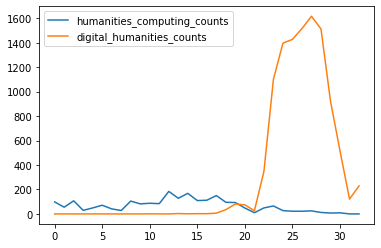

In [64]:
counts = humanist_vols[['humanities_computing_counts', 'digital_humanities_counts']]
counts.plot()